
# **Fix Contrast with Histogram Equalization**

In [1]:
# Our Setup, Import Libaries, Create our Imshow Function
import cv2
import random
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

### **Using Histogram Equalization**

![](https://docs.opencv.org/master/histogram_equalization.png)

This 'adjusts' the dynamic range of an image, making it spread more evenly accorss the intensity distribution, and thus improving contrast.

#### **First, let's take a look at the Histogram of our Input Image**

In [ ]:
gray_image = cv2.imread('night.jpeg',0)
imshow("gray_image", gray_image)

# Create our histogram distribution
hist, _ = np.histogram(gray_image.flatten(),256,[0,256])

# Get the Cumulative Sum
cdf = hist.cumsum()

# Get a normalize cumulative distribution
cdf_normalized = cdf * float(hist.max()) / cdf.max()  #The CDF represents the cumulative probability distribution of pixel intensities.

# Plot our CDF overlaid onto our Histogram
plt.plot(cdf_normalized, color = 'b')
plt.hist(gray_image.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## How the CDF is Computed

### Histogram Calculation:
- The image histogram counts how many pixels exist at each intensity level (0 to 255 for an 8-bit grayscale image).  
- **Example:** If 50 pixels have intensity **100**, the histogram at index **100** stores **50**.

### Cumulative Sum of the Histogram:
- The **CDF (Cumulative Distribution Function)** is obtained by **cumulatively summing** the histogram values.  
- Each CDF value represents the **total number of pixels** with intensity **less than or equal** to a given level.  
- **Example:**  
  \[
  CDF(100) = \text{histogram}(0) + \text{histogram}(1) + ... + \text{histogram}(100)
  \]

### Normalization (Optional):
- Often, the **CDF is scaled** to fit within a specific range (e.g., **0 to 1** or the **max histogram value**) for visualization or further processing.


#### **Now, let's apply Histogram Equalization**

In [ ]:
gray_image = cv2.imread('night.jpeg',0)
imshow("gray_image", gray_image)

# Equalize our Histogram
gray_image = cv2.equalizeHist(gray_image)
imshow("equalizeHist", gray_image)

# Create our histogram distribution
hist,_ = np.histogram(gray_image.flatten(),256,[0,256])

# Get the Cumulative Sum
cdf = hist.cumsum()

# Get a normalize cumulative distribution
cdf_normalized = cdf * float(hist.max()) / cdf.max()

# Plot our CDF overlaid onto our Histogram
plt.plot(cdf_normalized, color = 'b')
plt.hist(gray_image.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Comparison of CDF Normalization

| Aspect            | Before Equalization                 | After Equalization              |
|------------------|---------------------------------|--------------------------------|
| **Histogram**    | Skewed, clustered intensities  | More uniform, better contrast |
| **CDF Shape**    | Irregular, steep in clusters  | Smoother, more linear         |
| **Intensity Spread** | Limited range, uneven    | Full 0-255 range, evenly distributed |
| **Contrast**     | Low if values are concentrated | Improved, better detail visibility |

### Key Takeaway:
- **Before Equalization** → Uneven intensity distribution, low contrast.
- **After Equalization** → Evenly spread intensities, enhanced contrast.


Trying on a well distributed image

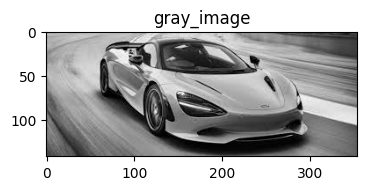

<ipython-input-2-818bb0a11da8>:11: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(gray_image.flatten(),256,[0,256], color = 'r')


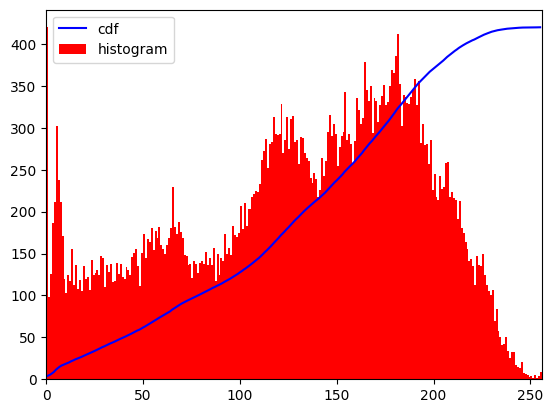

In [2]:
gray_image = cv2.imread('car.jpg',0)
imshow("gray_image", gray_image)


hist, _ = np.histogram(gray_image.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()  #The CDF represents the cumulative probability distribution of pixel intensities.

# Plot our CDF overlaid onto our Histogram
plt.plot(cdf_normalized, color = 'b')
plt.hist(gray_image.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

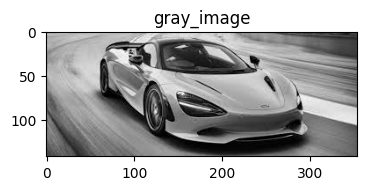

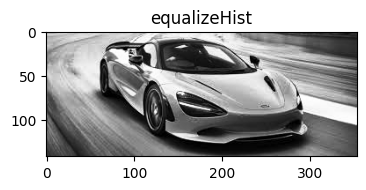

<ipython-input-3-9b50ab6b9f55>:12: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(gray_image.flatten(),256,[0,256], color = 'r')


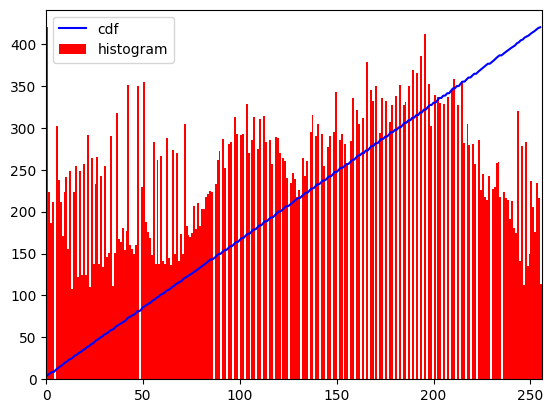

In [3]:
gray_image = cv2.imread('car.jpg',0)
imshow("gray_image", gray_image)
gray_image = cv2.equalizeHist(gray_image)
imshow("equalizeHist", gray_image)

hist, _ = np.histogram(gray_image.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()  #The CDF represents the cumulative probability distribution of pixel intensities.

# Plot our CDF overlaid onto our Histogram
plt.plot(cdf_normalized, color = 'b')
plt.hist(gray_image.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()